In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- What features seemed to be most impactful to performance?

In [2]:
amazon = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header=None)
amazon.columns = ["message", "rating"]
yelp = pd.read_csv('yelp_labelled.txt', sep="\t", header=None)
yelp.columns = ["message", "rating"]
imdb = pd.read_csv('imdb_labelled.txt', sep="\t", header=None)
imdb.columns = ["message", "rating"]
datalist = [amazon, yelp, imdb]
data = pd.concat(datalist)

## #1 Negative Classifier

In [3]:
negative = ['not', 'waste', 'no', "n't", 'little', 'poor', 'mis', 'bad', 'worse']

In [4]:
for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data[str(word)] = data.message.str.contains(
        str(word).lower(),
        case=False
    )

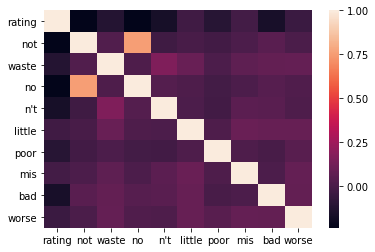

In [5]:
sns.heatmap(data.corr())

In [6]:
variables = data[negative]
target = data['rating']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Classify, storing the result in a new variable and Fit our model to the data.
y_pred = bnb.fit(variables, target).predict(variables)

# Display our results.
print("Number of mislabeled points out of a total {} points : {} or {}%".format(
    variables.shape[0],
    (target != y_pred).sum(),
    (target != y_pred).sum()/variables.shape[0]*100
))

Number of mislabeled points out of a total 2748 points : 918 or 33.4061135371179%


In [8]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

col_0     0     1
rating           
0       631   731
1       187  1199


In each of my models, I am trying to correctly identify the 'positive' statements. Therefore, a true positive is when the model correctly identified the positive statement and a true negative result is when the model rules out the statement as a negative one. A false positive result happens when the model mistakenly identify something as a positive statement when it is actually negative. A false negative in this scenario happens when we identify something as a negative statement that is really a positive one.

With this negative classifier, it produced 1199 true positive and 631 true negative results. The largest area of mistake appears to but the number of false positive results, 731. This is sometimes also called a "Type I Error" or a "false alarm". This model produced relatively few, 187, false negative results, also called a "Type II Error" or a "miss".

- Sensitivity is the percentage of positives correctly identified, in our case 1199/1386 or 86%.  This shows how good we are at catching positives, or how sensitive our model is at identifying the 'positive' statements.

- Specificity is just the opposite, the percentage of negatives correctly identified, 631/1362 or 46%. This is how good this model is at identifying the 'negative' statements.  

## #2 Positive Classifier

In [9]:
data = pd.concat(datalist)
positive = ['good','great','excellent','value','quality','quite','wonderful','recommend','well']
for word in positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data[str(word)] = data.message.str.contains(
        str(word).lower(),
        case=False
    )

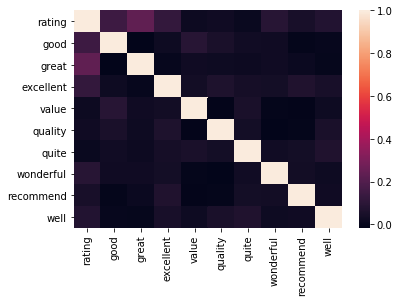

In [10]:
sns.heatmap(data.corr())

In [11]:
variables = data[positive]
target = data['rating']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Classify, storing the result in a new variable and Fit our model to the data.
y_pred = bnb.fit(variables, target).predict(variables)

# Display our results.
print("Number of mislabeled points out of a total {} points : {} or {}%".format(
    variables.shape[0],
    (target != y_pred).sum(),
    (target != y_pred).sum()/variables.shape[0]*100
))

Number of mislabeled points out of a total 2748 points : 1012 or 36.82678311499272%


In [13]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

col_0      0    1
rating           
0       1233  129
1        883  503


With this positive classifier, it produced 503 true positive and 1233 true negative results. The fewest mistakes appear to but the number of false positive results, 129. However, this model produced many, 883, false negative results, or "misses".

- Sensitivity is the percentage of positives correctly identified, in our case 503/1386 or 36%. This shows how good we are at catching positives, or identifying the 'positive' statements.

- Specificity is just the opposite, the percentage of negatives correctly identified, 1233/1362 or 90%. This is how good this model is at identifying the 'negative' statements. 

## #3 Frequent Positive Word Classifier

In [14]:
data = pd.concat(datalist)
good = data.loc[data.rating==1, 'message']

In [15]:
def modes(data):
    counting = {}
    for item in data.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1

    
    most = max(counting.values())

    least = min(counting.values())
    
    result = []
    
    for key,value in counting.items():
        if value >=50:
            result.append(key)
            
    return result

In [16]:
common_good_words = modes(good)
for word in common_good_words:
    data[str(word)] = data.message.str.contains(
        str(word),
        case=False
    )

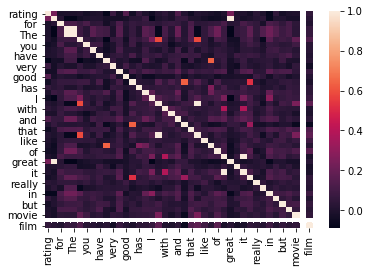

In [17]:
sns.heatmap(data.corr())

In [18]:
variables = data[common_good_words]
target = data['rating']

In [19]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Classify, storing the result in a new variable and Fit our model to the data.
y_pred = bnb.fit(variables, target).predict(variables)

# Display our results.
print("Number of mislabeled points out of a total {} points : {} or {}%".format(
    variables.shape[0],
    (target != y_pred).sum(),
    (target != y_pred).sum()/variables.shape[0]*100
))

Number of mislabeled points out of a total 2748 points : 1018 or 37.04512372634643%


In [20]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

col_0      0    1
rating           
0       1084  278
1        740  646


With this frequent positive word classifier, it tried to find the most common words in positive statement to see if it could better classify the dataset. It produced 646 true positive and 1084 true negative results. The fewest mistakes appear to but the number of false positive results, 278. However, this model again produced more false negative results or "misses", 740.

- Sensitivity is the percentage of positives correctly identified, in our case 646/1386 or 46%. This shows how good we are at catching positives, or identifying the 'positive' statements.

- Specificity is just the opposite, the percentage of negatives correctly identified, 1084/1362 or 79%. This is how good this model is at identifying the 'negative' statements. 

## #4 Frequent Negative Word Classifier

In [21]:
data = pd.concat(datalist)
bad = data.loc[data.rating==0, 'message']

In [22]:
common_bad_words = modes(bad)
for word in common_bad_words:
    data[str(word)] = data.message.str.contains(
        str(word),
        case=False
    )

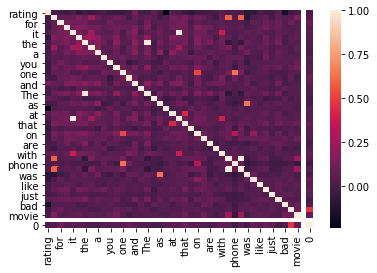

In [23]:
sns.heatmap(data.corr())

In [24]:
variables = data[common_bad_words]
target = data['rating']

In [25]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Classify, storing the result in a new variable and Fit our model to the data.
y_pred = bnb.fit(variables, target).predict(variables)

# Display our results.
print("Number of mislabeled points out of a total {} points : {} or {}%".format(
    variables.shape[0],
    (target != y_pred).sum(),
    (target != y_pred).sum()/variables.shape[0]*100
))

Number of mislabeled points out of a total 2748 points : 970 or 35.29839883551674%


In [26]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

col_0     0     1
rating           
0       721   641
1       329  1057


With this frequent negative word classifier, it tried to find the most common words in negative statement to see if it could also better classify the dataset. It produced 1057 true positive and 721 true negative results. The fewest mistakes in this model are the number of false negative results or "misses", 329. While the number of false positive results is higher, 641. 

- Sensitivity is the percentage of positives correctly identified, in our case 1057/1386 or 76%. This shows how good we are at catching positives, or identifying the 'positive' statements.

- Specificity is just the opposite, the percentage of negatives correctly identified, 721/1362 or 52%. This is how good this model is at identifying the 'negative' statements. 

## #5 Unique Good Word Classifier

In [27]:
data = pd.concat(datalist)
positive_words = []
for i in set(common_good_words).difference(common_bad_words):
    positive_words.append(i)
for word in positive_words:
    data[str(word)] = data.message.str.contains(
        str(word),
        case=False
    )

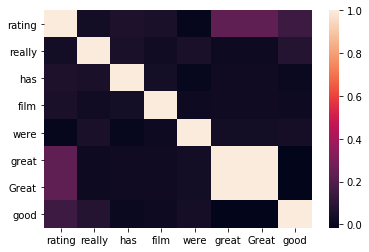

In [28]:
sns.heatmap(data.corr())

In [29]:
variables = data[positive_words]
target = data['rating']

In [30]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Classify, storing the result in a new variable and Fit our model to the data.
y_pred = bnb.fit(variables, target).predict(variables)

# Display our results.
print("Number of mislabeled points out of a total {} points : {} or {}%".format(
    variables.shape[0],
    (target != y_pred).sum(),
    (target != y_pred).sum()/variables.shape[0]*100
))

Number of mislabeled points out of a total 2748 points : 1068 or 38.864628820960704%


In [31]:
df_confusion = pd.crosstab(target, y_pred)
print(df_confusion)

col_0      0    1
rating           
0       1223  139
1        929  457


With this unique good word classifier, it takes the most frequent words from both the postive and negative statements and made a list that is unique to only the positive statements. It produced 457 true positive and 1223 true negative results. The fewest mistakes appear to but the number of false positive results, 139. However, this model produced many more false negative results or "misses", 929.

- Sensitivity is the percentage of positives correctly identified, in our case 457/1386 or 32%. This shows how good we are at catching positives, or identifying the 'positive' statements.

- Specificity is just the opposite, the percentage of negatives correctly identified, 1223/1362 or 89%. This is how good this model is at identifying the 'negative' statements. 

To answer this challenges questions:
- Do any of your classifiers seem to overfit?
No, I don't believe that any of the classifiers overfit because none of then accurately identify both the positive and negative statements but rather are biased to one or the other.
- Which seem to perform the best? Why?
I believe that the best performers are the frequent negative word and positive word classifiers. I believe this because their sensitivity and specificity are most even and balanced compared to the other classifiers.
- What features seemed to be most impactful to performance?
It is interesting that when each classifier tried to single out the positive or negative statements, it did exactly the opposite. For instance, when any positive statement classifiers is used it more accurately identifies the 'negative' statements rather than it's own supposedly more similar 'positive' data points. The same is true for the negative classifiers. 

Hi Alex, I was trying over the weekend to make a classifier that went through the dataset and checked if the unique positive word list are true while also checking that the unique negative word list is false for each statement. This way, that even if a sentence was true for the 'positive' words, it would also check that there weren't any of the negative words in it. I kept running into errors but I thought that I'd let you know about the problem that I worked on this weekend so that we can discuss it tonight. Thanks!

In [32]:
data = pd.concat(datalist)
positive_words = []
for i in set(common_good_words).difference(common_bad_words):
    positive_words.append(i)
negative_words = []
for i in set(common_bad_words).difference(common_good_words):
    negative_words.append(i)

In [34]:
positive = pd.Series(positive_words)
negative = pd.Series(negative_words)

In [35]:
for sentence in data:
    for word in positive:
        if data.message.str.contains(word).any() == True:
            for each in negative:
                if data.message.str.contains(word).any() == False:
                    print(data.message)